# Python之ML--实现机器学习分类算法

## 一.分类算法的选择

训练机器学习算法所涉及的五个主要步骤可以概述如下：
- 特征的选择
- 确定性能评价标准
- 选择分类器及其优化算法
- 对模型性能的评估
- 算法的调优

## 二.初涉分类算法

### 1.使用sklearn训练感知器

我们使用鸢尾花数据集中的两个特征.提取150个花朵样本中的花瓣长度和花瓣宽度两个特征的值,并由此构建特征矩阵X,同时将对应花朵所属类型的类标赋值给向量y

In [1]:
from sklearn import datasets
import numpy as np

iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

如果执行np.unique(y)返回存储在iris.target中的各类花朵的类标,可以看到：sklearn以分别将Iris-Sentosa,Iris-Versicolor和Iris-Virginia的类名另存为整数(0,1,2)

In [2]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

使用scikit-learn的preprocessing模块中的StandardScaler类对特征进行标准化处理.用变量sc作为对它的引用.使用StandardScaler中的fit方法,可以计算训练数据中每个特征的u(样本均值)和标准差.通过调用transform方法,可以使用前面计算得到的样本均值和标准差来对训练数据做标准化处理

In [3]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

sc.fit(X_train)

X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [4]:
from sklearn.linear_model import Perceptron

ppn=Perceptron(n_iter=40,eta0=0.1,random_state=0)
ppn.fit(X_train_std,y_train)

E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=None, n_iter=40, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=0, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [5]:
y_pred=ppn.predict(X_test_std)
print("Misclassified samples:%d"%(y_test!=y_pred).sum())

Misclassified samples:9


In [6]:
from sklearn.metrics import accuracy_score
print("Accuracy:%.2f"%accuracy_score(y_test,y_pred))

Accuracy:0.80


In [7]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z=Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # plot all samples
    X_test,y_test=X[test_idx,:],y[test_idx]
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker=markers[idx],label=cl)
        
    # highlight test samples
    if test_idx:
        X_test,y_test=X[test_idx,:],y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha=1.0,linewidth=1,marker='o',s=55,label='test set')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


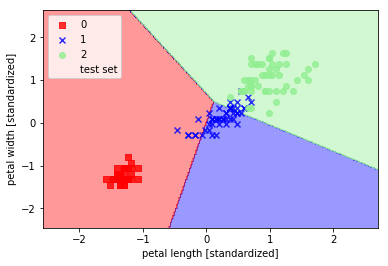

In [8]:
X_combined_std=np.vstack((X_train_std,X_test_std))
y_combined=np.hstack((y_train,y_test))

plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.show()

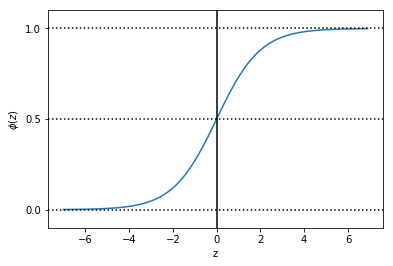

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

z=np.arange(-7,7,0.1)

phi_z=sigmoid(z)

plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.axhline(y=0.0,ls='dotted',color='k')
plt.axhline(y=0.5,ls='dotted',color='k')
plt.axhline(y=1.0,ls='dotted',color='k')
plt.yticks([0.0,0.5,1.0])
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA

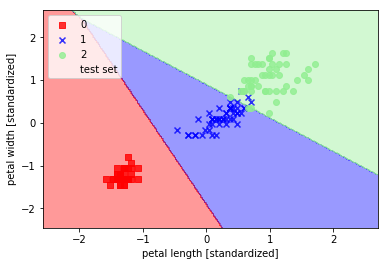

In [10]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(C=1000.0,random_state=0)
lr.fit(X_train_std,y_train)

plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.show()

In [18]:
lr.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[1.78177322e-11, 6.12453348e-02, 9.38754665e-01]])

E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\envs\mytensorflow\lib\site-packages\sklearn\linear_model\logistic.py:433: 

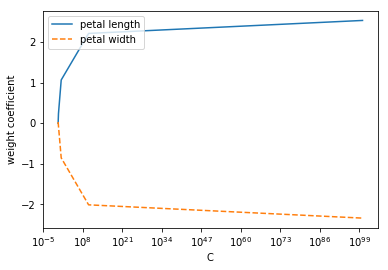

In [26]:
weights,params=[],[]

for c in np.arange(-5,5,dtype=float):
    lr=LogisticRegression(C=10**c,random_state=0)
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
    
weights=np.array(weights)

plt.plot(params,weights[:,0],label='petal length')
plt.plot(params,weights[:,1],linestyle='--',label='petal width')

plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


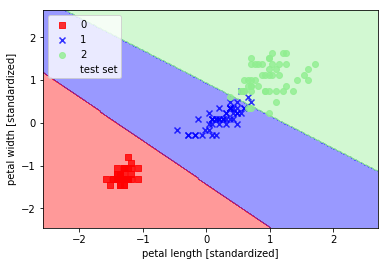

In [27]:
from sklearn.svm import SVC

svm=SVC(kernel='linear',C=1.0,random_state=0)
svm.fit(X_train_std,y_train)

plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.show()

In [28]:
from sklearn.linear_model import SGDClassifier

ppn=SGDClassifier(loss='perceptron')
lr=SGDClassifier(loss='log')
svm=SGDClassifier(loss='hinge')

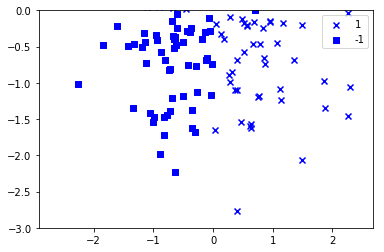

In [29]:
np.random.seed(0)

X_xor=np.random.randn(200,2)
y_xor=np.logical_xor(X_xor[:,0]>0,X_xor[:,1]>0)
y_xor=np.where(y_xor,1,-1)

plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='b',marker='s',label='-1')

plt.ylim(-3,0)
plt.legend()

plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


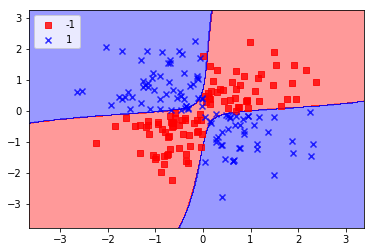

In [30]:
svm=SVC(kernel='rbf',random_state=0,gamma=0.1,C=10.0)

svm.fit(X_xor,y_xor)

plot_decision_regions(X_xor,y_xor,classifier=svm)

plt.legend(loc='upper left')

plt.show()